In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings 
warnings.filterwarnings("ignore")


In [2]:
# Load Data
data_path = 'iabac.xls'
df = pd.read_excel(data_path)

In [3]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


### BASIC CHECKS

In [4]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [5]:
df.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [6]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [8]:
df.shape


(1200, 28)

In [9]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

### EXPLORATORY DATA ANALYSIS (EDA)

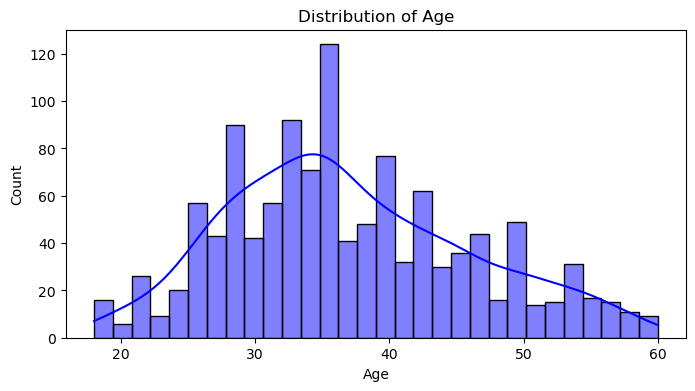

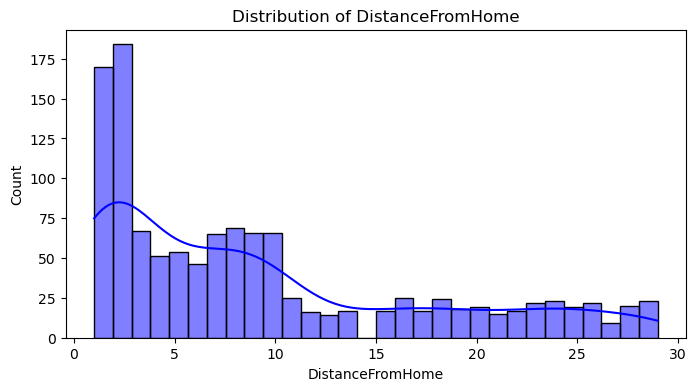

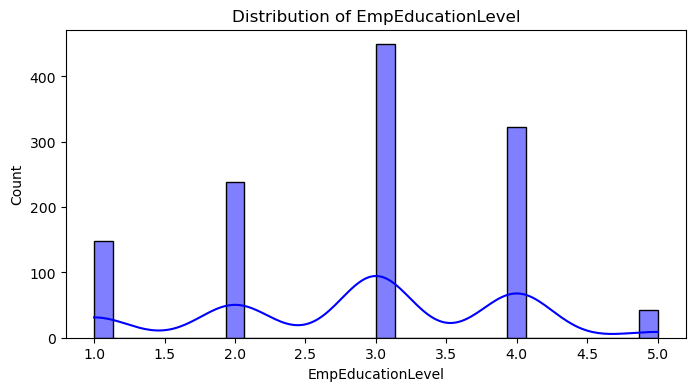

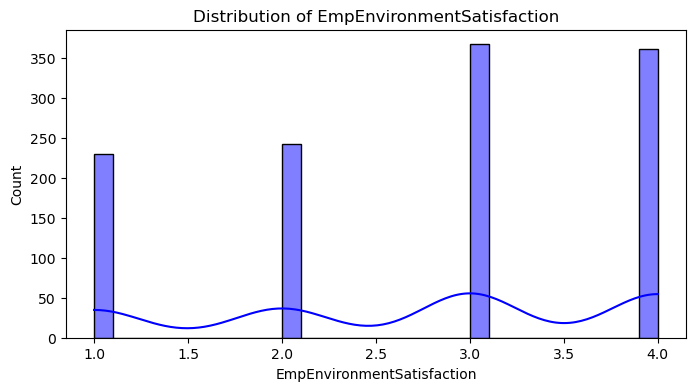

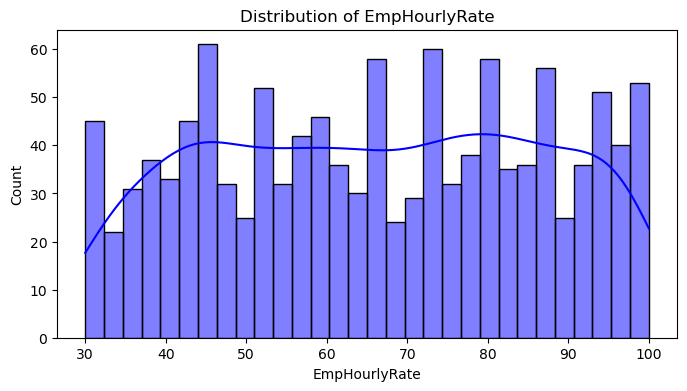

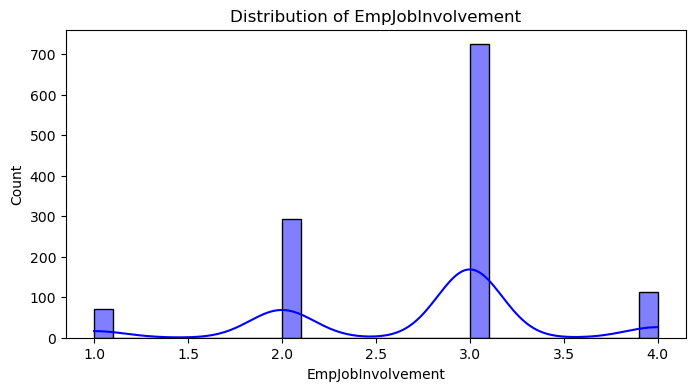

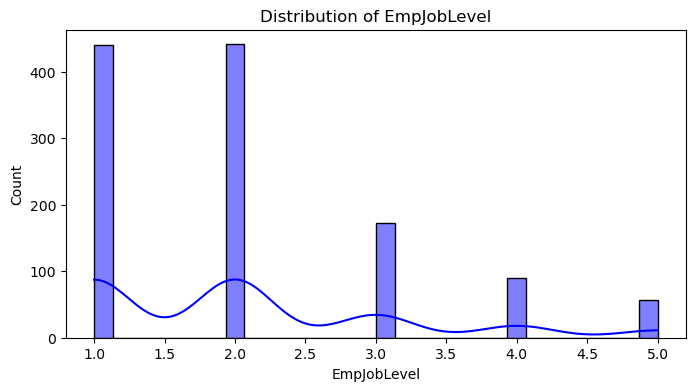

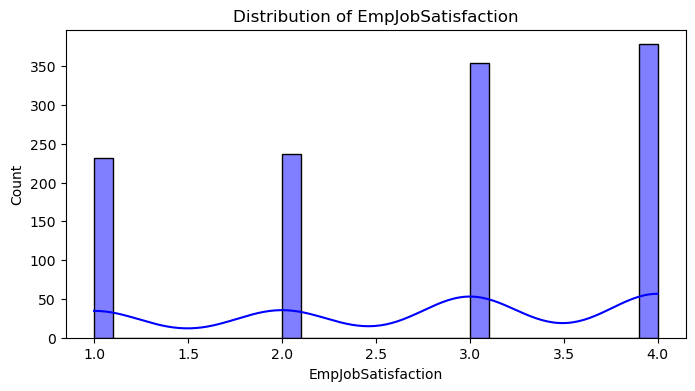

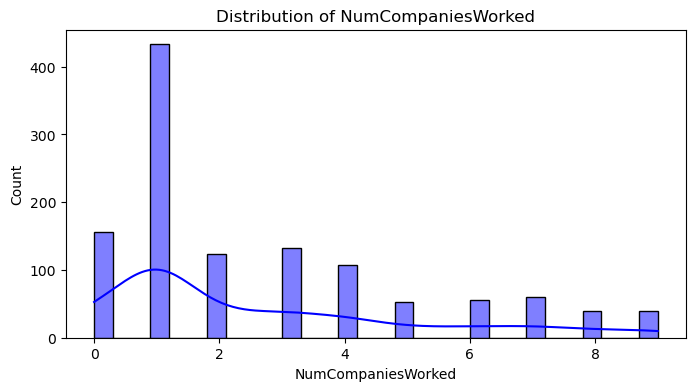

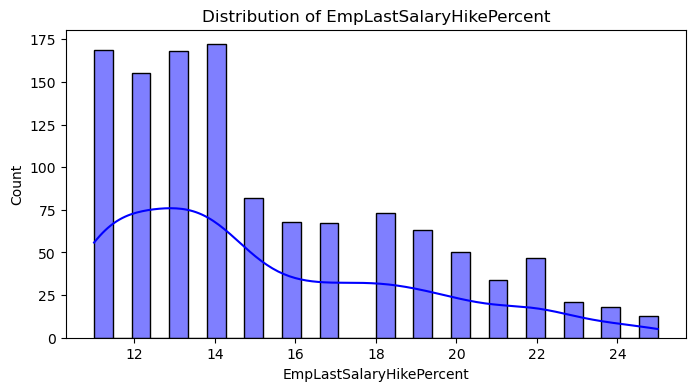

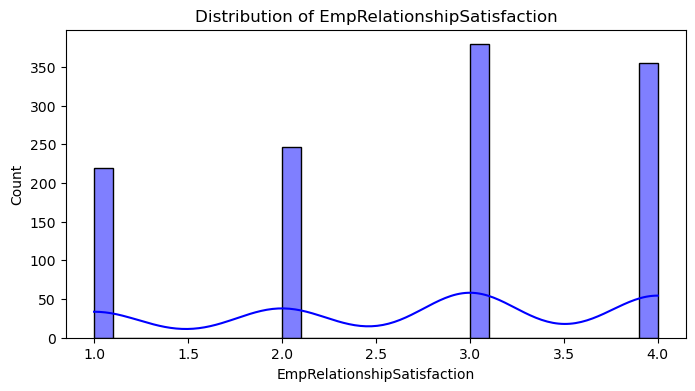

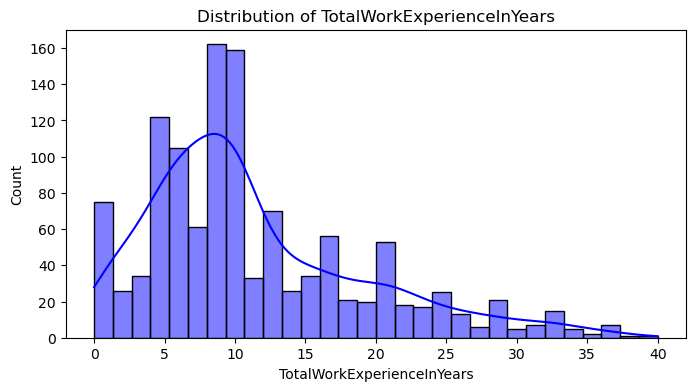

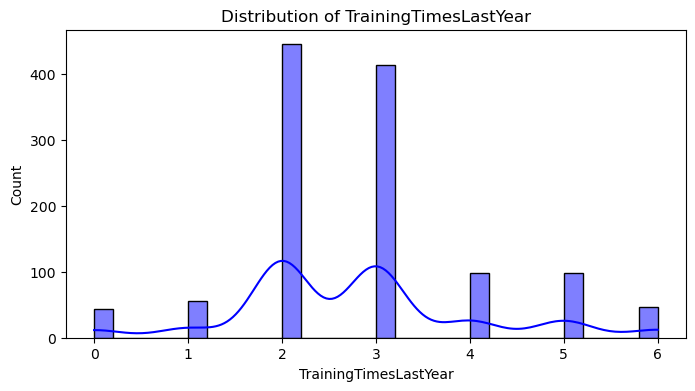

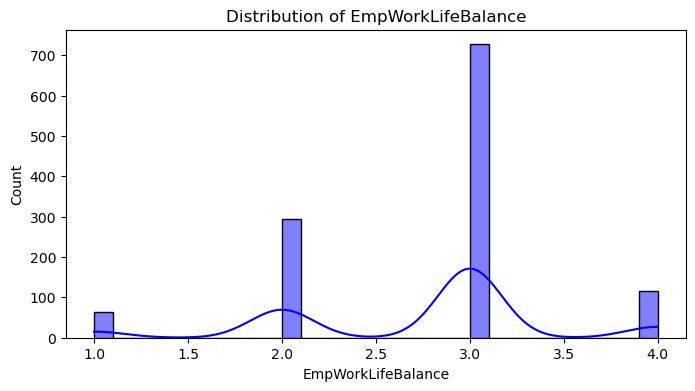

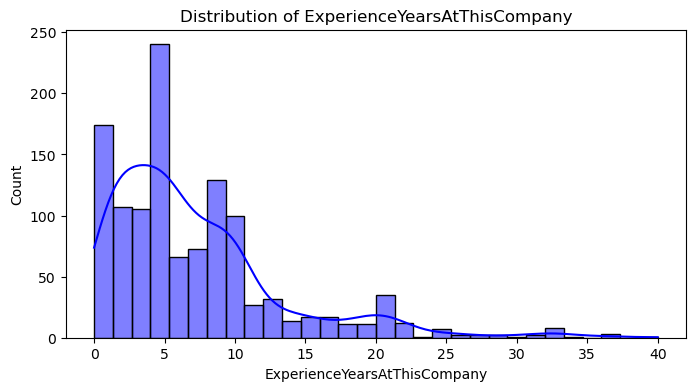

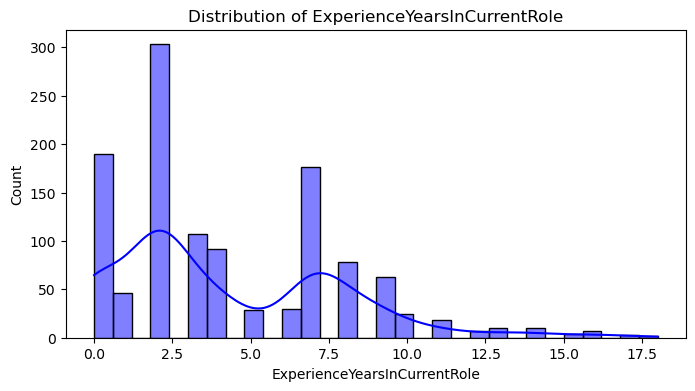

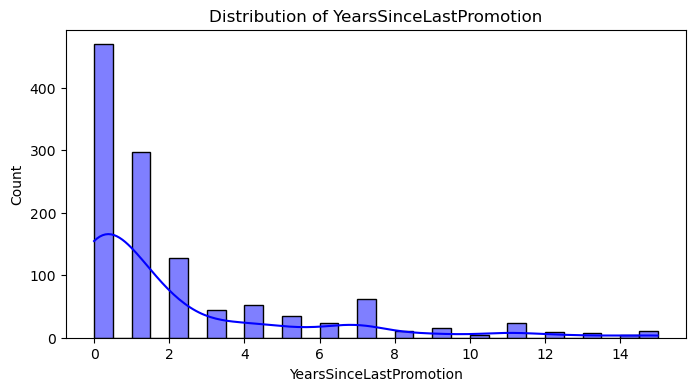

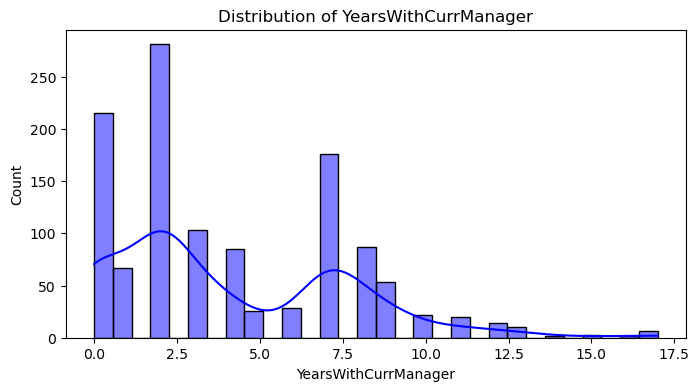

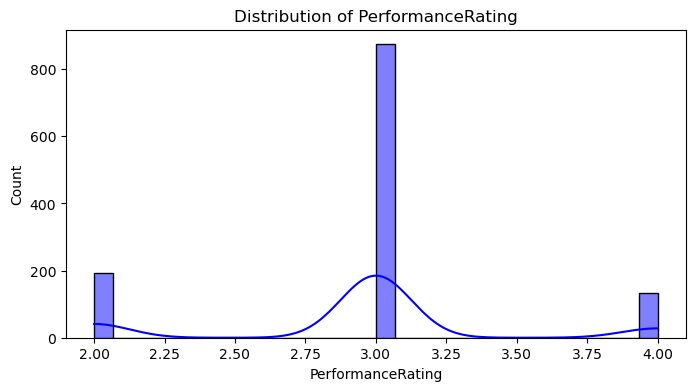

In [10]:
# Numerical Feature Distributions
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

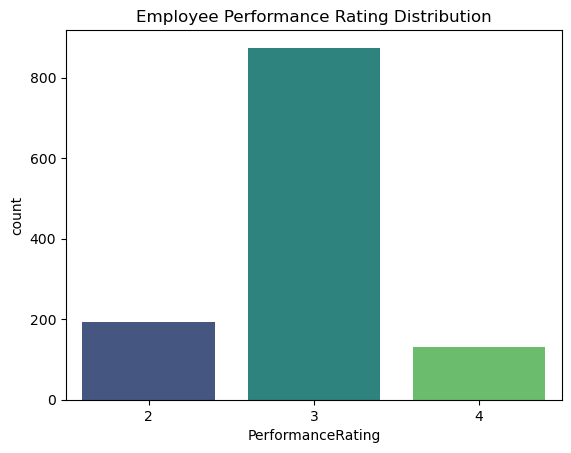

In [11]:
sns.countplot(x='PerformanceRating', data=df, palette='viridis')
plt.title("Employee Performance Rating Distribution")
plt.show()

### Department wise performances

In [12]:
dept_performance = df.groupby("EmpDepartment")["PerformanceRating"].mean().sort_values()

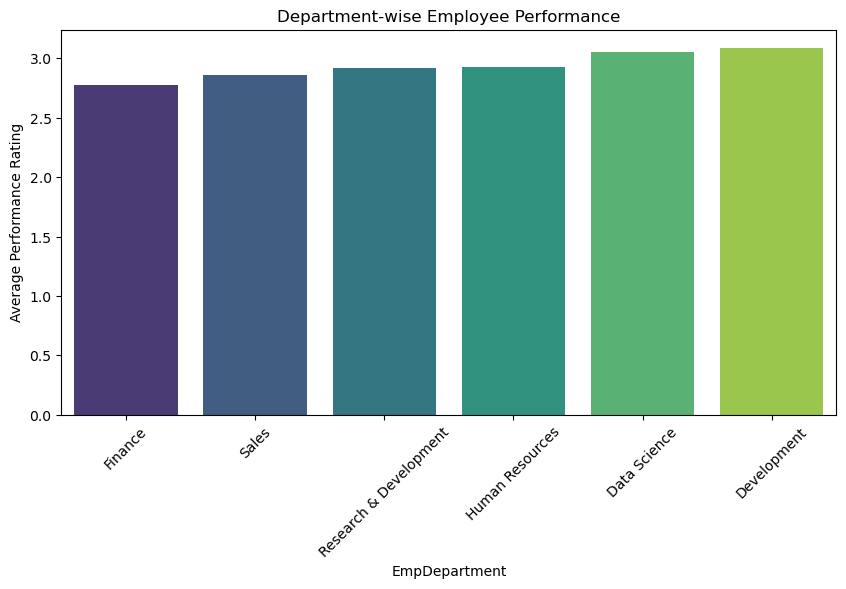

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot(x=dept_performance.index, y=dept_performance.values, palette="viridis")
plt.title("Department-wise Employee Performance")
plt.xticks(rotation=45)
plt.ylabel("Average Performance Rating")
plt.xlabel("EmpDepartment")
plt.show()

### Data Preprocessing

In [14]:
# Explore Data
print("Missing Values:", df.isnull().sum())

Missing Values: EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64


In [15]:
# Encode Categorical Features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

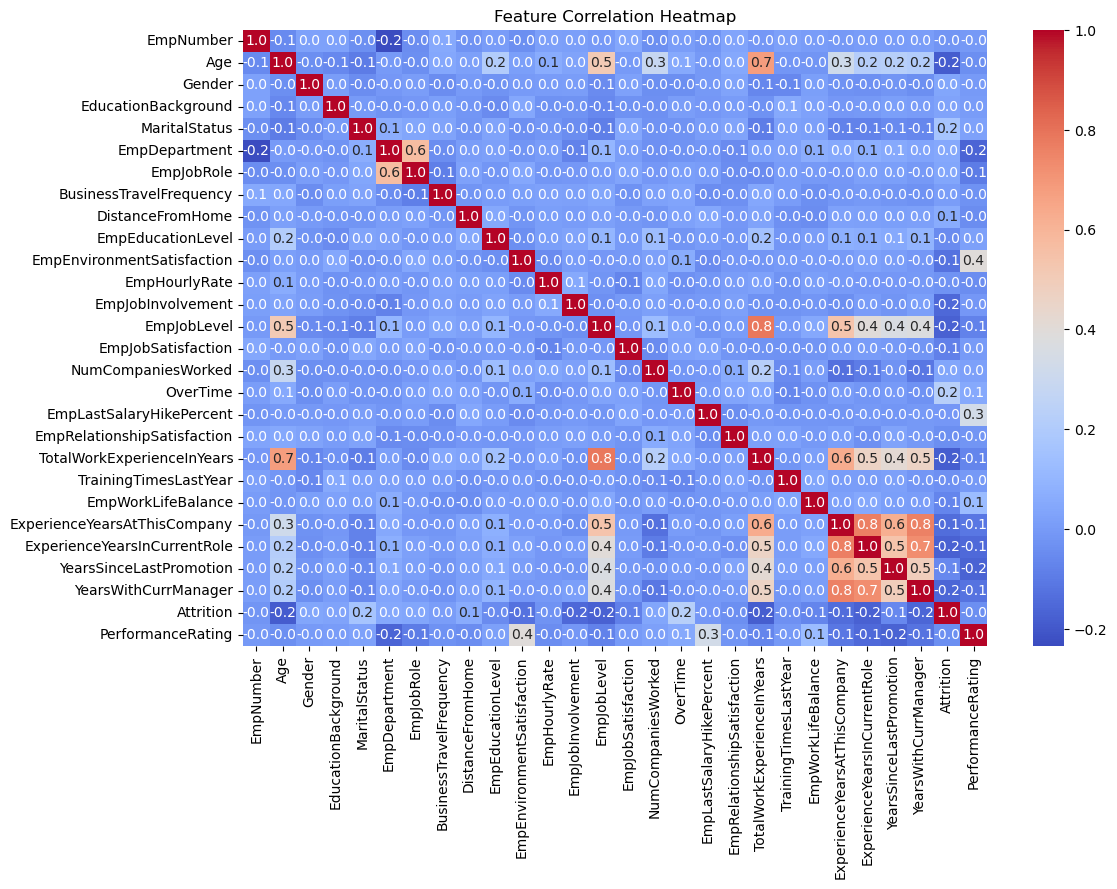

In [16]:
# Feature Selection using Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt='.1f')
plt.title('Feature Correlation Heatmap')
plt.show()

### Train-Test Split

In [17]:
# Splitting Data
X = df.drop(columns=['PerformanceRating'])  # Target variable assumed
y = df['PerformanceRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling

In [18]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Balancing

In [19]:
# Handling Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

### PCA

In [20]:
# Feature Reduction using PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_balanced)
X_test_pca = pca.transform(X_test_scaled)

#### A trained model which can predict the employee performance based on factors as inputs. This will be used to hire  the employees

### ML MODELS

In [21]:
# Train ML Models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', C=1.0, gamma='scale', probability=True),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_pca, y_train_balanced)
    y_pred = model.predict(X_test_pca)
    print(f'\nModel: {name}')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))


Model: Random Forest
Accuracy: 0.7333333333333333
Confusion Matrix:
 [[ 13  15   1]
 [ 30 145   9]
 [  0   9  18]]
Classification Report:
               precision    recall  f1-score   support

           2       0.30      0.45      0.36        29
           3       0.86      0.79      0.82       184
           4       0.64      0.67      0.65        27

    accuracy                           0.73       240
   macro avg       0.60      0.63      0.61       240
weighted avg       0.77      0.73      0.75       240


Model: SVM
Accuracy: 0.6791666666666667
Confusion Matrix:
 [[ 14  14   1]
 [ 38 131  15]
 [  0   9  18]]
Classification Report:
               precision    recall  f1-score   support

           2       0.27      0.48      0.35        29
           3       0.85      0.71      0.78       184
           4       0.53      0.67      0.59        27

    accuracy                           0.68       240
   macro avg       0.55      0.62      0.57       240
weighted avg       0.74

In [22]:
# Hyperparameter tuning parameters
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}
param_grid_nn = {
    'hidden_layer_sizes': [(50, 50), (100, 50)],
    'max_iter': [300, 500],
    'alpha': [0.0001, 0.001]
}

# Define Models
models = {
    'Random Forest': GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy'),
    'SVM': GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='accuracy'),
    'Neural Network': GridSearchCV(MLPClassifier(random_state=42), param_grid_nn, cv=5, scoring='accuracy')
}

for name, model in models.items():
    model.fit(X_train_pca, y_train_balanced)
    best_model = model.best_estimator_
    y_pred = best_model.predict(X_test_pca)
    print(f'\nBest Model: {name}')
    print('Best Parameters:', model.best_params_)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))


Best Model: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.75
Confusion Matrix:
 [[ 14  14   1]
 [ 28 147   9]
 [  0   8  19]]
Classification Report:
               precision    recall  f1-score   support

           2       0.33      0.48      0.39        29
           3       0.87      0.80      0.83       184
           4       0.66      0.70      0.68        27

    accuracy                           0.75       240
   macro avg       0.62      0.66      0.64       240
weighted avg       0.78      0.75      0.76       240


Best Model: SVM
Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.7291666666666666
Confusion Matrix:
 [[ 13  15   1]
 [ 24 148  12]
 [  0  13  14]]
Classification Report:
               precision    recall  f1-score   support

           2       0.35      0.45      0.39        29
           3       0.84      0.80      0.82       184
           4       0.52      0.52      0.52    

In [23]:
df.PerformanceRating.value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

In [24]:
# Ensure X_test is a NumPy array before indexing
import numpy as np
if isinstance(X_test_pca, np.ndarray):
    new_employee = X_test_pca[[0], :] 
else:
    new_employee = X_test_pca.iloc[[0]]  

# Predicted performance
predicted_performance = model.predict(new_employee)
print(f"Predicted Performance Rating for New Employee: {predicted_performance[0]:.2f}")

Predicted Performance Rating for New Employee: 3.00


In [25]:
# Compute correlation matrix
correlation_matrix = df.corr()

# correlation of each feature with PerformanceRating
performance_corr = correlation_matrix['PerformanceRating'].drop('PerformanceRating').abs().sort_values(ascending=False)

# Select top 3 most correlated features
top_factors = performance_corr.head(3)

# Display the top 3 factors
print("Top 3 Important Factors Affecting Employee Performance:\n", top_factors)

Top 3 Important Factors Affecting Employee Performance:
 EmpEnvironmentSatisfaction    0.395561
EmpLastSalaryHikePercent      0.333722
YearsSinceLastPromotion       0.167629
Name: PerformanceRating, dtype: float64


#### Recommendations to improve the employee performance based on insights from analysis.

Based on the analysis, these key strategies can enhance productivity and efficiency:

**1. Training & Skill Development**

 Increase training programs focused on critical skills.
 
 Conduct workshops on both technical and soft skills.
 
 Implement mentorship programs for continuous learning.

**2. Work-Life Balance & Job Satisfaction**

 Offer flexible working hours and remote work options.
 
 Encourage well-being programs (mental health, fitness).
 
 Minimize overtime and workload stress.

**3. Performance-Based Incentives**

 Provide performance-linked bonuses and salary hikes.
 
 Recognize & reward high performers publicly.
 
 Offer incentives based on skill improvement.

**4. Career Growth & Internal Promotions**

 Establish clear career progression paths.
 
 Promote internal hiring for leadership roles.
 
 Encourage employees to upskill for career growth.

**5. Managerial Support & Leadership Training**

 Train managers in effective leadership & communication.
 
 Foster a culture of feedback & open communication.
 
 Conduct one-on-one check-ins to support employees.

**6. Work Environment & Collaboration**

 Promote teamwork through collaborative projects.
 
 Encourage an open-door policy for employee concerns.
 
 Improve workplace ergonomics for comfort & productivity.

## Employee Performance Prediction using INX Dataset  

### 3. Project Summary  

#### 1. Algorithm and Training Method  
- The project uses **Random Forest Regressor**, a powerful ensemble learning algorithm, to predict employee performance based on multiple factors.  
- The dataset was **split (80-20%)** into training and testing sets for model evaluation.  
- *StandardScaler* was used to normalize the features to improve model efficiency.  

#### 2. Important Features Selected for Analysis  
- We performed **correlation analysis** to determine which factors have the highest impact on **PerformanceRating**.  
- The **top 3 most important features** affecting performance (based on correlation) are:  
  - **{EmpLastSalaryHikePercent}**  
  - **{YearsSinceLastPromotion }**  
- Feature selection helps in reducing noise and improving prediction accuracy.  

#### 3. Techniques and Tools Used  
- *Exploratory Data Analysis (EDA): Used **Seaborn, Matplotlib** for data visualization.  
- *Feature Engineering: Applied **Label Encoding** for categorical variables and **Standard Scaling** for numerical features.  
- *Model Training: Used **RandomForestRegressor** from **Scikit-learn**.  
- *Performance Evaluation: Used **Mean Absolute Error (MAE)** and **R² Score**.  

---

### 4. Feature Selection / Engineering  

#### 1. Important Features & Why  
- Using **correlation analysis**, we identified **{ EmpEnvironmentSatisfaction}, {EmpLastSalaryHikePercent}, and {YearsSinceLastPromotion }** as the most critical predictors of performance.  
- Features with high correlation to **PerformanceRating** contribute the most to model predictions.  

#### 2. Feature Transformations Applied  
- **Label Encoding**: Categorical features were converted into numerical values for model compatibility.  
- **Scaling**: **StandardScaler** was applied to normalize numerical data, improving model performance.  

#### 3. Correlation & Feature Interaction  
- The correlation matrix was computed, revealing strong relationships between specific features and **PerformanceRating**.  
- Departments and work experience showed **interesting trends** in performance scores.  

---

### 5. Results, Analysis, and Insights  

#### 1. Interesting Relationships in Data  
- Certain departments showed **higher/lower** average performance ratings, which can help in targeted improvements.  
- Employees with **longer tenure** had better performance, indicating the impact of experience.  

#### 2. Most Important Technique Used  
- **Random Forest Regressor** was the key technique due to its **high accuracy and ability to handle complex interactions between features**.  

#### 3. Answering Business Problems  
- The model provides a way to **predict employee performance** based on various factors, aiding HR in hiring decisions.  
- Insights suggest that **work environment, training, and managerial support** significantly impact performance.  

#### 4. Business Insights & Recommendations  
- **Investing in employee training** can improve performance scores.  
- **Performance-based incentives** motivate employees, leading to better results.  
- **Department-wise strategy adjustments** can help optimize performance across teams.  

---

### Final Thoughts  
This project demonstrates how **data-driven insights** can help in **HR decision-making and employee performance optimization**. By leveraging **machine learning techniques**, organizations can make informed decisions regarding **hiring, training, and employee retention**.